In [1]:
#Importing the necessary libraries-->

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and checking the first five rows-->

df=pd.read_csv('Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
#Checking the basic details of the dataframe-->

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
#Checking the statistical values-->

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30641.0,499.556607,288.747894,0.0,249.0,500.0,750.0,999.0
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


In [5]:
#Checking for the null values-->

df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
#Dropping the irrelevant variable-->

df.drop(columns=['Unnamed: 0'], inplace=True)

# Missing value treatment-->

In [7]:
#Checking the data in EthnicGroup column-->

df['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [8]:
#Filling the missing value in 'EthnicGroup' column by its mode-->

df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0], inplace=True)

In [9]:
#Checking the data in ParentEduc column-->

df['ParentEduc'].value_counts()

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

In [10]:
#Replacing 'some high school' with 'high school' and filling the missing values with 'unknown'-->

df['ParentEduc'].replace('some high school', 'high school', inplace=True)
df['ParentEduc'].fillna('Unknown', inplace=True)

In [11]:
#Checking the data in TestPrep column-->

df['TestPrep'].value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [12]:
#Filling the missing value in 'TestPrep' column by its mode-->

df['TestPrep'].fillna(df['TestPrep'].mode()[0], inplace=True)

In [13]:
#Checking the data in ParentMaritalStatus column-->

df['ParentMaritalStatus'].value_counts()

married     16844
single       7097
divorced     4919
widowed       591
Name: ParentMaritalStatus, dtype: int64

In [14]:
#Imputing the missing value in 'ParentMaritalStatus' column by 'Unknown'-->

df['ParentMaritalStatus'].fillna('Unknown', inplace=True)

In [15]:
#Checking the data in PracticeSport column-->

df['PracticeSport'].value_counts()

sometimes    15213
regularly    10793
never         4004
Name: PracticeSport, dtype: int64

In [16]:
#Filling the missing value in 'PracticeSport' column by its mode-->

df['PracticeSport'].fillna(df['PracticeSport'].mode()[0], inplace=True)

In [17]:
#Checking the data in IsFirstChild column-->

df['IsFirstChild'].value_counts()

yes    19082
no     10655
Name: IsFirstChild, dtype: int64

In [18]:
#Filling the missing value in 'IsFirstChild' column by its mode-->

df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0], inplace=True)

In [19]:
#Checking the data in NrSiblings column-->

df['NrSiblings'].value_counts()

1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: NrSiblings, dtype: int64

In [20]:
#Filling the missing value in 'NrSiblings' column by its mode-->

df['NrSiblings'].fillna(df['NrSiblings'].mode()[0], inplace=True)

In [21]:
#Checking the data in TransportMeans column-->

df['TransportMeans'].value_counts()

school_bus    16145
private       11362
Name: TransportMeans, dtype: int64

In [22]:
#Filling the missing value in 'TransportMeans' column by its mode-->

df['TransportMeans'].fillna(df['TransportMeans'].mode()[0], inplace=True)

In [23]:
#Checking the data in WklyStudyHours column-->

df['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [24]:
#Filling the missing value in 'WklyStudyHours' column by its mode-->

df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0], inplace=True)

In [25]:
#Checking for the missing values once again-->

df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [26]:
#Checking the correlation among the numeric variables-->

df.corr()

,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.000538,-0.000412,-0.001584
MathScore,-0.000538,1.000000,0.817825,0.807118
ReadingScore,-0.000412,0.817825,1.000000,0.952584
WritingScore,-0.001584,0.807118,0.952584,1.000000


<Axes: >

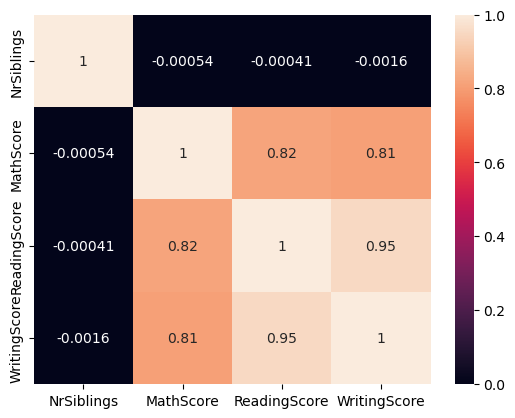

In [27]:
#Plotting a heatmap-->

sns.heatmap(df.corr(), annot=True)

In [28]:
#Creating new datasets of numeric & categorical columns only-->

numcol=df.select_dtypes(include='number')
catcol=df.select_dtypes(include='object')

# Univariate Analysis-->

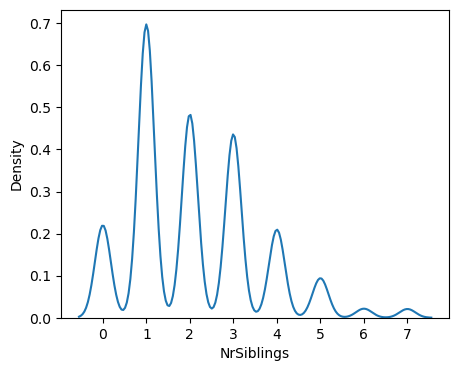

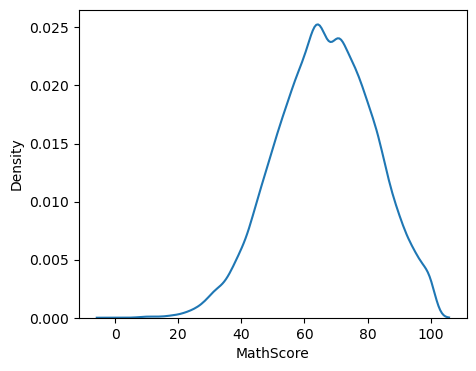

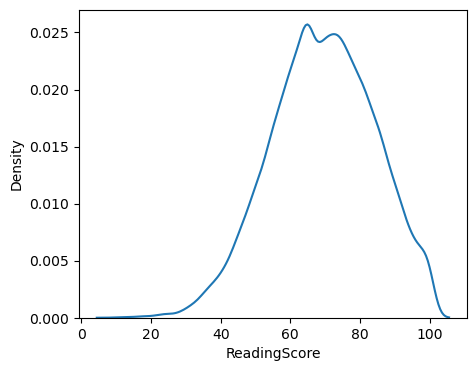

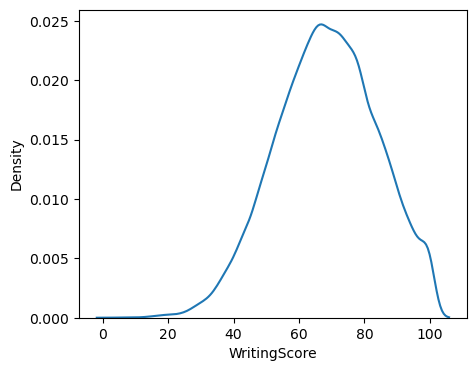

In [29]:
#Creating a kdeplot for each numerical column to check the distribution/Skewness of the data-->

for i in numcol:
    plt.figure(figsize=(5,4))
    sns.kdeplot(x=i, data=numcol)
    plt.show()

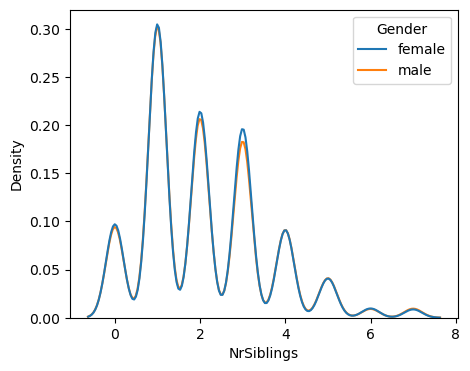

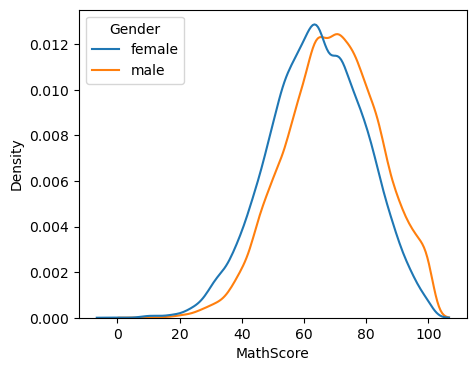

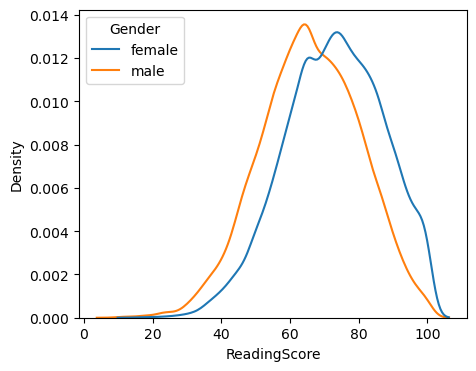

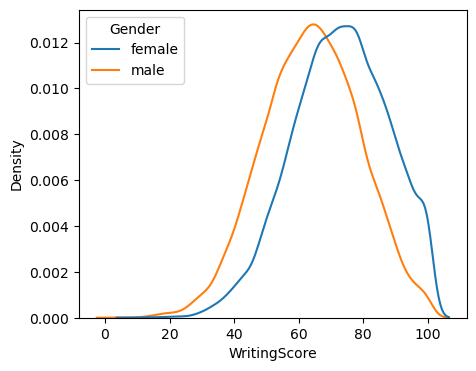

In [30]:
#Again creating a kdeplot for each numerical column by keeping WklyStudyHours in Hue->

for i in numcol:
    plt.figure(figsize=(5,4))
    sns.kdeplot(x=i, data=df, hue='Gender')
    plt.show()

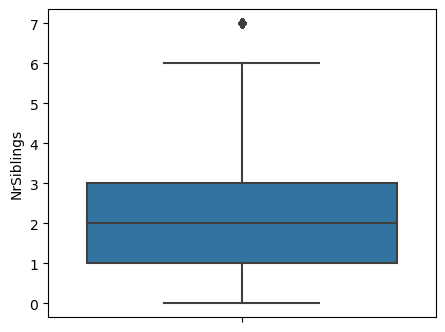

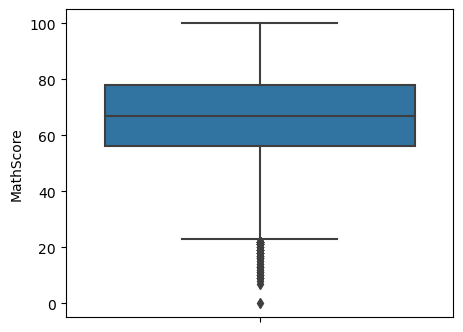

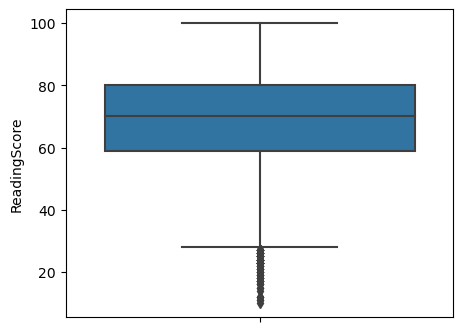

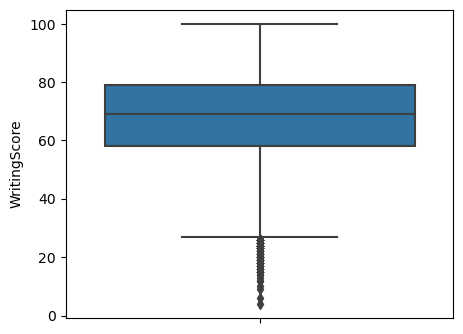

In [31]:
#Plotting a Boxplot to check for the outliers-->

for i in numcol:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=i, data=numcol)
    plt.show()

In [32]:
#Removing outliers-->

df.drop(df[df['NrSiblings']>6].index, inplace=True)
df.drop(df[df['MathScore']<21].index, inplace=True)
df.drop(df[df['ReadingScore']<25].index, inplace=True)
df.drop(df[df['WritingScore']<25].index, inplace=True)

# Bivariate Analysis-->

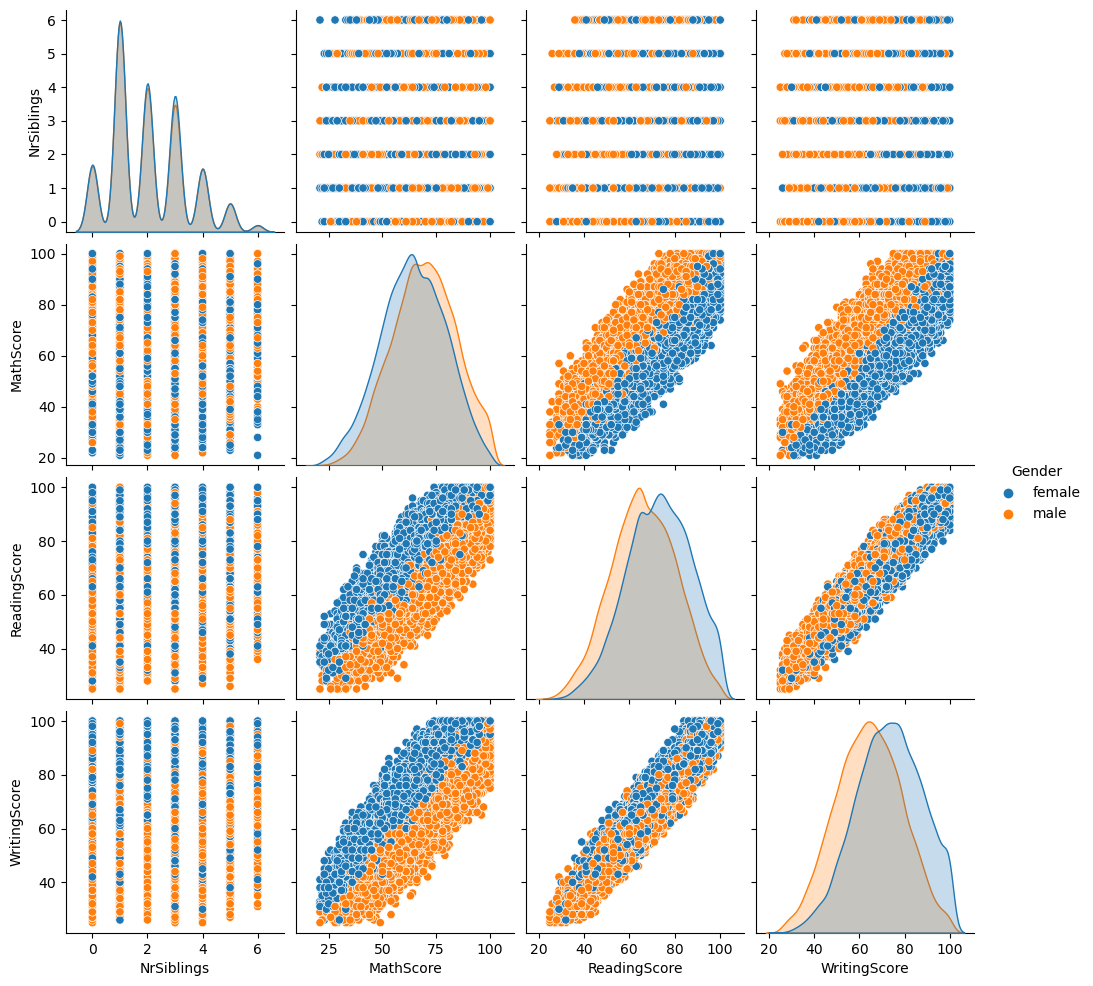

In [33]:
#Creating a Pairplot by keeping 'Gender' in hue-->

sns.pairplot(df, hue='Gender')
plt.show()

# Groupby Analysis-->

In [34]:
#Creating a group based on 'ParentEduc' by considering mean marks of each subject-->

gb1=df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].agg('mean')
gb1.head()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
Unknown,66.728477,69.349890,68.438190
associate's degree,68.462434,71.227579,70.408950
bachelor's degree,70.464136,73.070831,73.349671
high school,63.805132,66.658324,64.822361
master's degree,72.353907,75.860129,76.389746


In [35]:
#Now creating a group based on 'EthnicGroup' by considering mean marks of each subject-->

gb2=df.groupby('EthnicGroup')[['MathScore','ReadingScore','WritingScore']].agg('mean')
gb2.head()

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,63.219523,67.016957,65.482585
group B,63.753005,67.603031,66.199965
group C,65.145560,68.729911,67.358251
group D,67.766514,70.468455,70.985576
group E,75.281461,74.261446,72.687766


In [36]:
#Creating a group based on 'Gender' by considering mean marks of each subject-->

gb3=df.groupby('Gender')[['MathScore','ReadingScore','WritingScore']].agg('mean')
gb3.head()

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.223906,72.979663,72.986092
male,69.270422,66.061733,64.133609


In [37]:
#Creating a group based on 'WklyStudyHours'-->

gb4=df.groupby('WklyStudyHours')[['MathScore','ReadingScore','WritingScore']].agg('mean')
gb4.head()

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,67.003417,69.813914,68.809201
< 5,64.796873,68.387665,67.307153
> 10,68.860764,70.519501,69.942278


In [38]:
#Creating a group based on 'TestPrep'-->

gb5=df.groupby('TestPrep')[['MathScore','ReadingScore','WritingScore']].agg('mean')
gb5.head()

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.590498,73.764694,74.734748
none,65.340450,67.512858,65.630791
